# Sonoran Desert: CMIP6 projections
#### Discharge in 2025
Discharge in 2025, 2050, 2075 and 2100 for the climate scenarios SSP1-2.6, SSP2-4.5 and SSP5-8.5. The camel that is used for this notebook is: hysets_09488650

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt
from cartopy import crs
from cartopy import feature as cfeature
import fiona
import shapely.geometry
from pyproj import Geod
from rich import print
import pandas as pd
import xarray as xr

import ewatercycle.forcing
import ewatercycle.models
import ewatercycle.parameter_sets

### Setting up the model for SSP1-2.6
Location of the groundwater recharge: Gila river near Yuma.

In [2]:
station_latitude = 32.71555556
station_longitude = -114.533386

Loading the parameter set and forcing set. Setting up the PCR-GlobWB model. 

In [3]:
parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory= "/data/shared/parameter-sets/pcrglobwb_global",
    config="./pcrglobwb_sonoran_ERA5_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)
#print(parameter_set)

In [4]:
forcing126 = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory="/home/emol/forcing/sonoran_desert_CMIP_SSP126_25/work/diagnostic/script",
)
#print(forcing)

In [5]:
pcrglob126 = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing126
)
#print(pcrglob)

Starting and initializing the model

In [6]:
#start_time = "2025-01-01T00:00:00Z"
#end_time = "2025-12-31T00:00:00Z"

cfg_file126, cfg_dir126 = pcrglob126.setup(
    start_tine="2025-01-01T00:00:00Z",
    end_time="2025-12-31T00:00:00Z",
    max_spinups_in_years=0
)
cfg_file126, cfg_dir126

('/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250109_094419/pcrglobwb_ewatercycle.ini',
 '/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250109_094419')

In [7]:
pcrglob126.initialize(cfg_file126)

In [8]:
time126 = pd.date_range(pcrglob126.start_time_as_isostr, pcrglob126.end_time_as_isostr)
timeseries126 = pd.DataFrame(
    index=pd.Index(time126, name="time"), columns=["PCRGlobWB: Sonoran Desert"]
)

In [9]:
while pcrglob126.time < pcrglob126.end_time:
    pcrglob126.update()

    # Track discharge at station location
    discharge_at_station126 = pcrglob126.get_value_at_coords(
        "discharge", lat=[station_latitude], lon=[station_longitude]
    )
    time126 = pcrglob126.time_as_isostr
    timeseries126["PCRGlobWB: Sonoran Desert"][time126] = discharge_at_station126[0]

    # Show progress
    #print(time126,end='\r')  # "\r" clears the output before printing the next timestamp


<Axes: xlabel='time'>

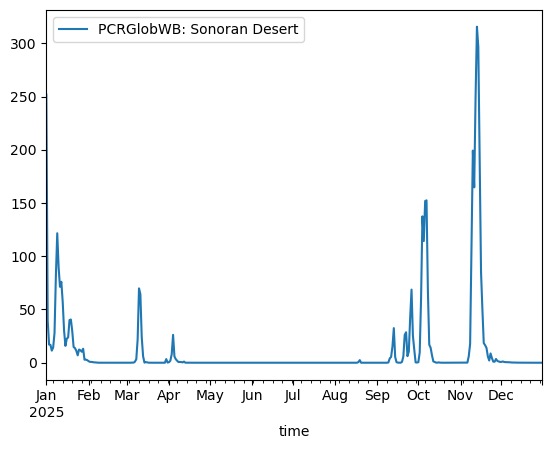

In [10]:
timeseries126.plot()

Now the model can be used. A map is made to show the location of the Gila River near Yumafor SSP1-2.6.

In [ ]:
da126 = pcrglob126.get_value_as_xarray("discharge")

In [ ]:
fig126 = plt.figure(dpi=120)
ax126 = fig126.add_subplot(111, projection=crs.PlateCarree())
da126.plot(ax=ax126, cmap="GnBu")

# Overlay ocean and coastines
ax126.add_feature(cfeature.OCEAN)
ax126.add_feature(cfeature.RIVERS, color="k")
ax126.coastlines()

# Add a red cross marker at specified location near the Gila River
ax126.scatter(station_longitude, station_latitude, s=250, c="r", marker="x", lw=2)
ax126.set_title("Sonoran Desert SSP1-2.6", fontsize=12);

### Now for SSP2-4.5
First, set up the forcing that will be used in the model.

In [11]:
parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory= "/data/shared/parameter-sets/pcrglobwb_global",
    config="./pcrglobwb_sonoran_ERA5_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)

In [12]:
forcing245 = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory="/home/emol/forcing/sonoran_desert_CMIP_SSP245_25/work/diagnostic/script",
)

In [13]:
pcrglob245 = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing245
)

In [14]:
#start_time = "2025-01-01T00:00:00Z"
#end_time = "2025-12-31T00:00:00Z"

cfg_file245, cfg_dir245 = pcrglob245.setup(
    start_time="2025-01-01T00:00:00Z",
    end_time="2025-12-31T00:00:00Z",
    max_spinups_in_years=0
)
cfg_file245, cfg_dir245

('/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250109_100339/pcrglobwb_ewatercycle.ini',
 '/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250109_100339')

In [15]:
pcrglob245.initialize(cfg_file245)

In [16]:
time245 = pd.date_range(pcrglob245.start_time_as_isostr, pcrglob245.end_time_as_isostr)
timeseries245 = pd.DataFrame(
    index=pd.Index(time245, name="time"), columns=["PCRGlobWB: Sonoran Desert"]
)

In [17]:
while pcrglob245.time < pcrglob245.end_time:
    pcrglob245.update()

    # Track discharge at station location
    discharge_at_station245 = pcrglob245.get_value_at_coords(
        "discharge", lat=[station_latitude], lon=[station_longitude]
    )
    time245 = pcrglob245.time_as_isostr
    timeseries245["PCRGlobWB: Sonoran Desert"][time245] = discharge_at_station245[0]

    # Show progress
    #print(time245,end='\r')  # "\r" clears the output before printing the next timestamp


_InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "Socket closed"
	debug_error_string = "UNKNOWN:Error received from peer  {grpc_message:"Socket closed", grpc_status:14, created_time:"2025-01-09T11:11:06.64509563+01:00"}"
>

Now the model can be used. A map is made to show the location of the Gila River near Yuma for SSP4-6.0.

In [ ]:
da245 = pcrglob245.get_value_as_xarray("discharge")

In [ ]:
fig245 = plt.figure(dpi=120)
ax245 = fig245.add_subplot(111, projection=crs.PlateCarree())
da245.plot(ax=ax245, cmap="GnBu")

# Overlay ocean and coastines
ax245.add_feature(cfeature.OCEAN)
ax245.add_feature(cfeature.RIVERS, color="k")
ax245.coastlines()

# Add a red cross marker at specified location near the Gila River
ax245.scatter(station_longitude, station_latitude, s=250, c="r", marker="x", lw=2)
ax245.set_title("Sonoran Desert SSP2-4.5", fontsize=12);

### Now for SSP5-8.5
First, set up the forcing.

In [ ]:
parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory= "/data/shared/parameter-sets/pcrglobwb_global",
    config="./pcrglobwb_sonoran_ERA5_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)
#print(parameter_set)

In [ ]:
forcing585 = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory="/home/emol/forcing/sonoran_desert_CMIP_SSP585_25/work/diagnostic/script",
)
#print(forcing)

In [ ]:
pcrglob585 = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing585
)

In [ ]:
#start_time = "2025-01-01T00:00:00Z"
#end_time = "2025-12-31T00:00:00Z"

cfg_file585, cfg_dir585 = pcrglob585.setup(
    start_time="2025-01-01T00:00:00Z",
    end_time="2025-12-31T00:00:00Z",
    max_spinups_in_years=0
)
cfg_file585, cfg_dir585

In [ ]:
pcrglob585.initialize(cfg_file585)

In [ ]:
time585 = pd.date_range(pcrglob585.start_time_as_isostr, pcrglob585.end_time_as_isostr)
timeseries585 = pd.DataFrame(
    index=pd.Index(time585, name="time"), columns=["PCRGlobWB: Sonoran Desert"]
)

In [ ]:
while pcrglob585.time < pcrglob585.end_time:
    pcrglob585.update()

    # Track discharge at station location
    discharge_at_station585 = pcrglob585.get_value_at_coords(
        "discharge", lat=[station_latitude], lon=[station_longitude]
    )
    time585 = pcrglob585.time_as_isostr
    timeseries585["PCRGlobWB: Sonoran Desert"][time585] = discharge_at_station585[0]

    # Show progress
    #print(time585,end='\r')  # "\r" clears the output before printing the next timestamp


Now the model can be used. A map is made to show the location of the Gila River near Yuma for SSP5-8.5.

In [ ]:
da585 = pcrglob585.get_value_as_xarray("discharge")

In [ ]:
fig585 = plt.figure(dpi=120)
ax585 = fig585.add_subplot(111, projection=crs.PlateCarree())
da585.plot(ax=ax585, cmap="GnBu")

# Overlay ocean and coastines
ax585.add_feature(cfeature.OCEAN)
ax585.add_feature(cfeature.RIVERS, color="k")
ax585.coastlines()

# Add a red cross marker at specified location near the Gila River
ax585.scatter(station_longitude, station_latitude, s=250, c="r", marker="x", lw=2)
ax585.set_title("Sonoran Desert SSP5-8.5", fontsize=12);

### Plotting the timeseries

In [ ]:
plt.plot(timeseries126, label="SSP1-2.6", color="green")
plt.plot(timeseries245, label="SSP2-4.5", color="darkblue")
plt.plot(timeseries585, label="SSP5-8.5", color="orange")
#plt.axhline(y=0.966, color="red", linestyle="--", label="Threshold")

plt.title("Discharge CMIP6 (2025")
plt.xlabel("Time")
plt.ylabel("Discharge [m3/s]")
plt.xticks(rotation=45, ha='right')
plt.legend(loc=1);

In [ ]:
pcrglob126.finalize()
pcrglob245.finalize()
pcrglob585.finalize()